In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess Data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train_flat = x_train.reshape(len(x_train), -1)  # Flatten for ML models
x_test_flat = x_test.reshape(len(x_test), -1)

# Function to compute metrics
def compute_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    auc_roc = roc_auc_score(pd.get_dummies(y_true), pd.get_dummies(y_pred), multi_class='ovr')
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"],
        "AUC-ROC": auc_roc
    }

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_flat, y_train)
y_pred_log = log_reg.predict(x_test_flat)
log_metrics = compute_metrics(y_test, y_pred_log, "Logistic Regression")

# Naïve Bayes
nb = GaussianNB()
nb.fit(x_train_flat, y_train)
y_pred_nb = nb.predict(x_test_flat)
nb_metrics = compute_metrics(y_test, y_pred_nb, "Naïve Bayes")

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_flat, y_train)
y_pred_rf = rf.predict(x_test_flat)
rf_metrics = compute_metrics(y_test, y_pred_rf, "Random Forest")

# LSTM Model
x_train_lstm = x_train.reshape(-1, 28, 28)  # Reshape for LSTM
x_test_lstm = x_test.reshape(-1, 28, 28)

model_lstm = Sequential([
    LSTM(128, return_sequences=True, input_shape=(28, 28)),
    LSTM(64),
    Dense(10, activation='softmax')
])

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(x_train_lstm, y_train, epochs=5, batch_size=64, validation_data=(x_test_lstm, y_test))

# Evaluate LSTM
y_pred_lstm = np.argmax(model_lstm.predict(x_test_lstm), axis=1)
lstm_metrics = compute_metrics(y_test, y_pred_lstm, "LSTM")

# CNN Model
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

model_cnn = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(x_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(x_test_cnn, y_test))

# Evaluate CNN
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=1)
cnn_metrics = compute_metrics(y_test, y_pred_cnn, "CNN")

# Simulated Federated Learning (Decentralized Training)
def federated_training(model, x_data, y_data, num_splits=5, epochs=1):
    split_data = np.array_split(x_data, num_splits)
    split_labels = np.array_split(y_data, num_splits)
    for i in range(num_splits):
        model.fit(split_data[i], split_labels[i], epochs=epochs, verbose=0)
    return model

# Apply Federated Learning to CNN
model_fed = keras.models.clone_model(model_cnn)
model_fed.set_weights(model_cnn.get_weights())
# Compile the cloned model before using it for federated training
model_fed.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
federated_training(model_fed, x_train_cnn, y_train, num_splits=5, epochs=1)
y_pred_fed = np.argmax(model_fed.predict(x_test_cnn), axis=1)
fed_metrics = compute_metrics(y_test, y_pred_fed, "Federated")

# Create metrics table
metrics_df = pd.DataFrame([log_metrics, nb_metrics, rf_metrics, lstm_metrics, cnn_metrics, fed_metrics])
print(metrics_df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7511 - loss: 0.7474 - val_accuracy: 0.9619 - val_loss: 0.1270
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9653 - loss: 0.1168 - val_accuracy: 0.9736 - val_loss: 0.0839
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9773 - loss: 0.0785 - val_accuracy: 0.9805 - val_loss: 0.0603
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9841 - loss: 0.0556 - val_accuracy: 0.9784 - val_loss: 0.0675
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.9833 - val_loss: 0.0532
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8364 - loss: 0.5132 - val_accuracy: 0.9829 - val_loss: 0.0528
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0915 - val_accuracy: 0.9884 - val_loss: 0.0339
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9816 - loss: 0.0616 - val_accuracy: 0.9879 - val_loss: 0.0327
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0478 - val_accuracy: 0.9897 - val_loss: 0.0302
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9901 - val_loss: 0.0303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                 Model  Accuracy  Precision  Recall  F1 Score   AUC-ROC
0  Logistic Regression    0.9258   0.925587  0.9258  0.925622  0.958237
1          Naïve Bayes    0.5558   0.691726  0.5558  0.517042  0.749562
2        Random Forest    0.9702   0.970184  0.9702  0.970172  0.98

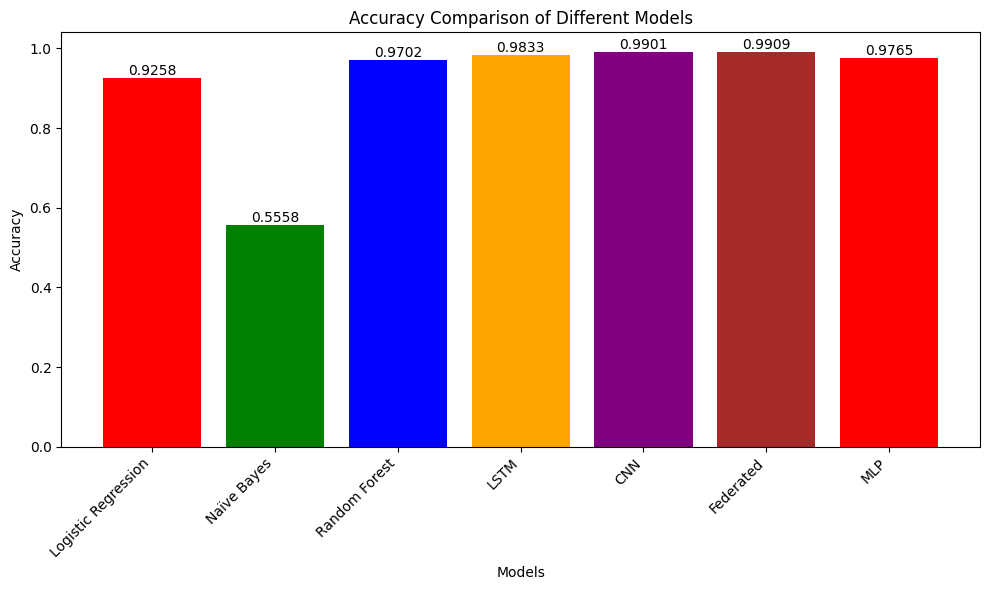

In [ ]:
import matplotlib.pyplot as plt



models = metrics_df["Model"]
accuracy = metrics_df["Accuracy"]

colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color=colors)


for bar, acc in zip(bars, accuracy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{acc:.4f}", ha='center', va='bottom')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


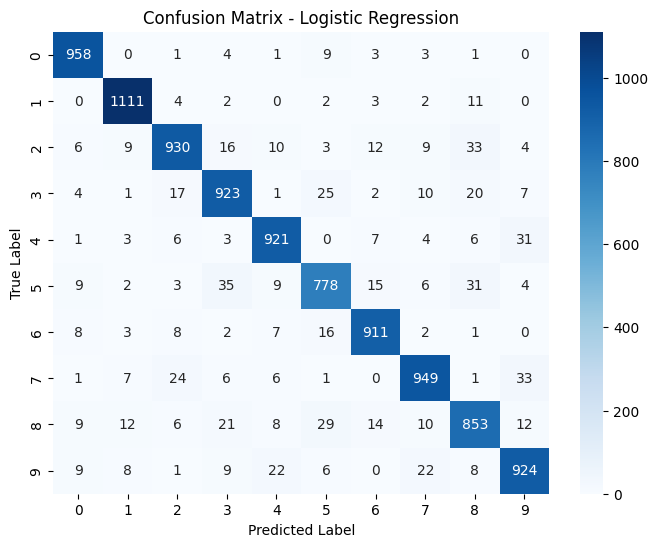

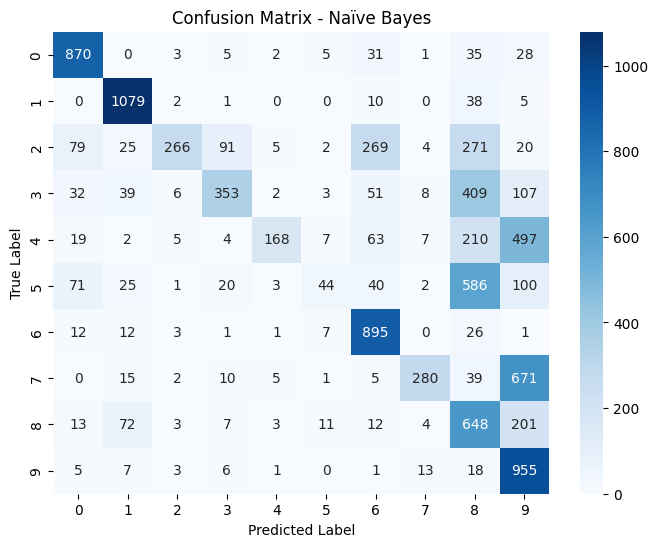

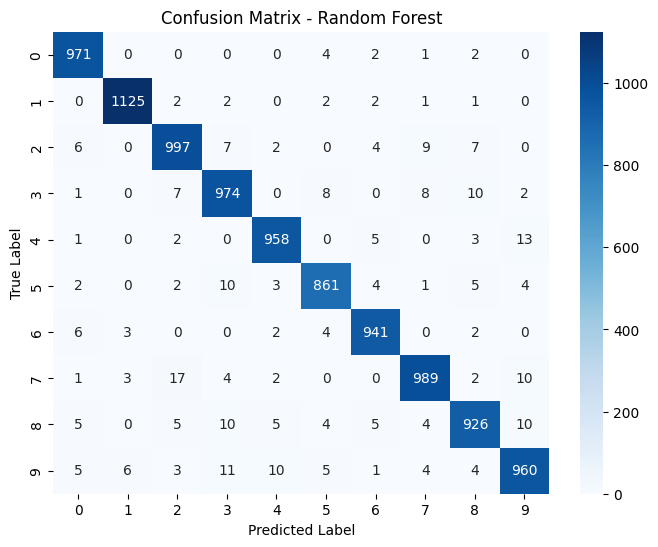

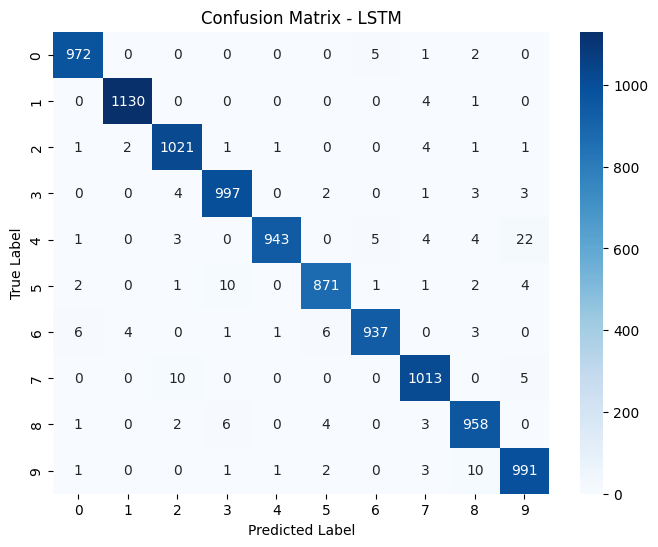

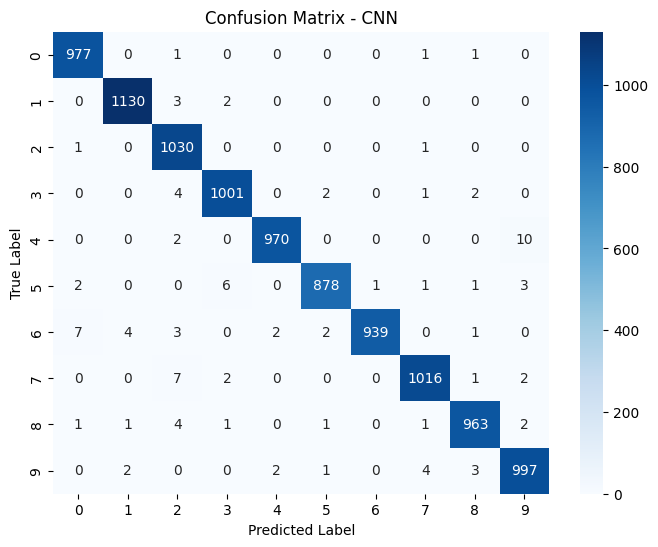

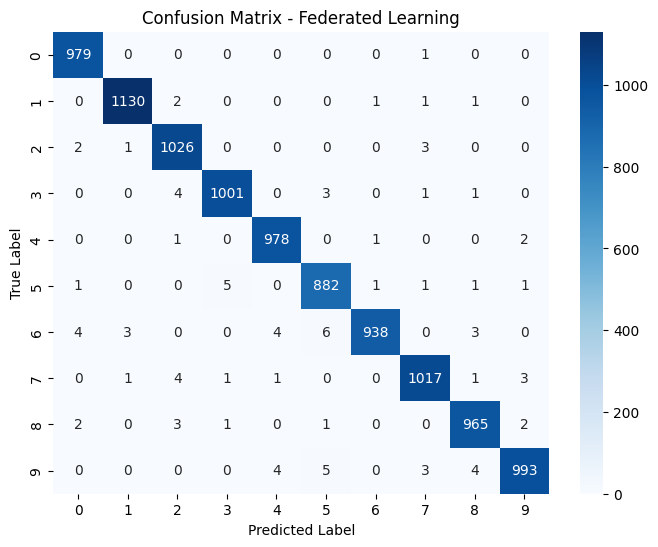

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Confusion Matrix for Federated Learning
cm_fed = confusion_matrix(y_test, y_pred_fed)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_fed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Federated Learning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8819 - loss: 0.4192
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9687 - loss: 0.1026
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9788 - loss: 0.0682
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0439
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0375
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


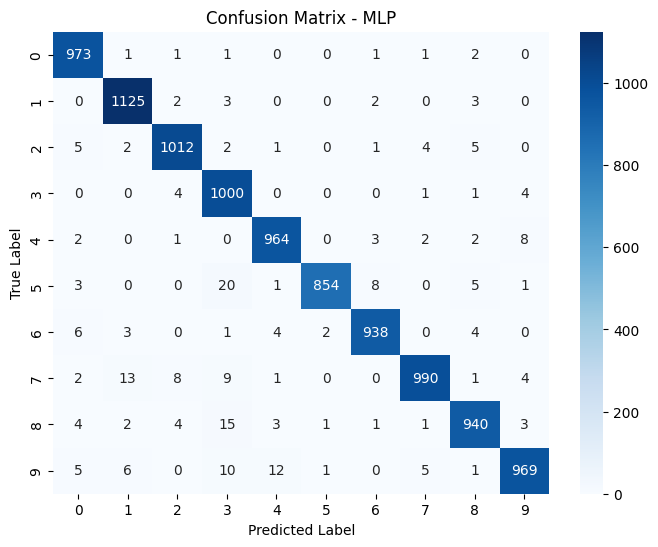

In [ ]:
# MLP Model
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_mlp.fit(x_train_flat, y_train, epochs=5)

y_pred_mlp = np.argmax(model_mlp.predict(x_test_flat), axis=1)
mlp_metrics = compute_metrics(y_test, y_pred_mlp, "MLP")
metrics_df = pd.concat([metrics_df, pd.DataFrame([mlp_metrics])], ignore_index=True)

# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Logistic Regression,0.9258,0.925587,0.9258,0.925622,0.958237
1,Naïve Bayes,0.5558,0.691726,0.5558,0.517042,0.749562
2,Random Forest,0.9702,0.970184,0.9702,0.970172,0.983332
3,LSTM,0.9833,0.983396,0.9833,0.983297,0.990566
4,CNN,0.9901,0.990156,0.9901,0.990102,0.994403
5,Federated,0.9909,0.990919,0.9909,0.990896,0.994889
6,MLP,0.9765,0.976775,0.9765,0.976502,0.986765
